In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats # 통계 함수 사용

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/시소프로젝트/1-1 excellent 컷오프 완료.csv', index_col=0)
data.head(1)

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,...,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,...,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [5]:
df = data.copy()
df.head(1)

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,...,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,...,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [6]:
# 기존 19개 컬럼에서 'X', 'Y', '위도UTMK', '경도UTMK', '총합 9' 총 5개를 빼서 14개의 열 drop
df2 = df.iloc[:,3:]
df2.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [7]:
df3 = df2.drop(['X', 'Y', '위도UTMK', '경도UTMK', '총합 9'], axis = 1)
df3

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,디지털정보지수
1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,9168.42
2,1.0,0.0,1.0,2.0,360.0,0.0,2558435.0,5.0,1285,920,1991,15.210701,64.540432,6455.13
3,0.0,1.0,0.0,0.0,0.0,0.0,161760.0,3.0,240,221,674,8.250258,35.608309,2243.48
6,2.0,0.0,0.0,1.0,0.0,0.0,718820.0,0.0,508,374,1415,6.263099,35.901060,7323.87
7,0.0,0.0,0.0,0.0,37.0,0.0,2135562.0,3.0,786,682,2717,3.982974,28.928966,17054.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.0,0.0,0.0,0.0,170.0,6.0,2670108.0,5.0,798,604,3346,3.764684,23.849372,20953.38
443,0.0,1.0,0.0,1.0,15.0,0.0,2413815.0,3.0,895,564,2697,6.623742,33.185020,10457.07
444,0.0,0.0,0.0,0.0,443.0,3.0,5942970.0,2.0,1334,943,4455,3.672402,29.943883,39840.23
445,0.0,0.0,0.0,1.0,489.0,0.0,943800.0,3.0,363,325,2600,1.670425,13.961538,28298.14


In [8]:
column = df3.columns
column

Index(['공원수', '도서관수', '병원수', '배움터수', '동별강좌정원', '사고건수', '독거노인포함', '대중교통', '합계',
       '일반', '65세이상고령자', '전연령별독거노인비율', '노인인구별독거노인비율', '디지털정보지수'],
      dtype='object')

## Standard scaler

In [9]:
scaler = StandardScaler()
dfstan3 = scaler.fit_transform(df3)
dfstan3 = pd.DataFrame(dfstan3, columns = column)
dfstan3.head()

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,디지털정보지수
0,1.995322,2.103655,-0.314159,-0.466936,-0.746355,-0.176186,-1.136415,-0.447988,-1.096052,-0.691643,-1.636607,0.925393,1.002870,-1.618131
1,1.995322,-0.667827,2.360218,2.514271,0.196239,-0.176186,-0.659720,2.149952,0.732524,0.935897,-1.531431,5.866992,5.646525,-1.905938
2,-0.413576,0.717914,-0.314159,-0.466936,-0.898386,-0.176186,-1.436356,0.850982,-2.016917,-1.908230,-2.467352,2.125877,1.516138,-2.352679
3,4.404220,-0.667827,-0.314159,1.023668,-0.898386,-0.176186,-1.255842,-1.097473,-1.311798,-1.285696,-1.940763,1.057815,1.557931,-1.813788
4,-0.413576,-0.667827,-0.314159,-0.466936,-0.785883,-0.176186,-0.796751,0.850982,-0.580367,-0.032490,-1.015502,-0.167712,0.562586,-0.781620


## Sparse PCA

In [10]:
# 알파값은 일종의 규제로, 알파값이 클수록, 데이터 간의 거리가 커져, 밀도가 낮아진다.
spca = SparsePCA(random_state = 42)
spca = spca.fit_transform(dfstan3)
explained_variance = np.var(spca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance)
print(explained_variance_ratio)

[0.98029605 0.98029605 0.98029605 0.98029605 0.98029605 0.98029605
 0.98029605 0.98029605 0.98029605 0.98029605 0.98029605 0.98029605
 0.98029605 0.98029605]
[0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]


In [11]:
# 각 컴포넌트의 분산비율, 설명력이 가장 높은 알파값 alpha = 2.79593을 대입. (하이퍼 파라미터 튜닝)
spca = SparsePCA(n_components = 3, alpha = 2.79593, random_state=42)
principlecomponents = spca.fit_transform(dfstan3)
principlecomponents[0]

array([-2.38734628,  1.85256131, -0.43754725])

In [12]:
spca_components = pd.DataFrame(spca.components_, columns = list(dfstan3.columns))
spca_components

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,디지털정보지수
0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.504103,0.00000,0.478869,0.466167,0.473315,0.000000,0.000000,0.274273
1,0.036362,0.0,0.014368,0.0,-0.207212,0.000000,0.000000,0.00000,0.088618,0.000000,-0.116137,0.625098,0.618061,-0.401804
2,0.000000,0.0,0.000000,0.0,0.000000,0.705018,0.000000,0.70919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
# SPCA축의 가장 중요한 변수
n_pcs= spca.components_.shape[0]
most_important = [np.abs(spca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = dfstan3.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

df = pd.DataFrame(dic.items())
df.columns = ['spca','element']
df['value']=None
for i in range(len(df)):
    a = df['element'][i]
    df['value'][i] = spca_components[a][i]
    
df

,spca,element,value
0,PC1,독거노인포함,0.504103
1,PC2,전연령별독거노인비율,0.625098
2,PC3,대중교통,0.70919


* spca를 이용해서 가장 중요한 변수 : 독거노인포함, 전연령별독거노인비율, 대중교통.

## 3차원 시각화

In [16]:
spca_columns = ['spca_component_'+ str(x+1) for x in range(0,3)]
f_spca = pd.DataFrame(principlecomponents, columns = spca_columns)
spca_result=pd.DataFrame(principlecomponents, columns = spca_columns)
spca_result.head()

,spca_component_1,spca_component_2,spca_component_3
0,-2.387346,1.852561,-0.437547
1,0.208262,8.175535,1.386644
2,-3.988595,2.966470,0.474548
3,-2.950440,2.417554,-0.893595
4,-1.302969,0.600801,0.474548


In [17]:
df3 = df3.reset_index()

In [18]:
# 원본 = df3
df3.head(2)

,level_0,index,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,디지털정보지수
0,0,1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,9168.42
1,1,2,1.0,0.0,1.0,2.0,360.0,0.0,2558435.0,5.0,1285,920,1991,15.210701,64.540432,6455.13


In [19]:
# 주요변수들을 가지고 클러스터링 
kmeans_spca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_spca.fit(principlecomponents)

df3['cluster'] = kmeans_spca.labels_

f_kmeans_spca = pd.concat([df3, spca_result], axis = 1)
f_kmeans_spca.head(3)

,level_0,index,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,디지털정보지수,cluster,spca_component_1,spca_component_2,spca_component_3
0,0,1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,9168.42,0,-2.387346,1.852561,-0.437547
1,1,2,1.0,0.0,1.0,2.0,360.0,0.0,2558435.0,5.0,1285,920,1991,15.210701,64.540432,6455.13,0,0.208262,8.175535,1.386644
2,2,3,0.0,1.0,0.0,0.0,0.0,0.0,161760.0,3.0,240,221,674,8.250258,35.608309,2243.48,0,-3.988595,2.966470,0.474548


In [20]:
f_kmeans_spca.drop(columns=['index','level_0'],inplace=True)

In [23]:
df3['cluster'] = kmeans_spca.labels_
df3['cluster'].value_counts()

1    150
3     89
0     78
2     15
Name: cluster, dtype: int64

In [24]:
color_list = {0:"crimson", 1:"orange", 2:"green", 3:"royalblue", 4: "purple", 5: "dimgrey", 6: "gold"}

def ClusteringPlot(n_clusters, color_list) : 
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    color_list = {n:c for n,c in color_list.items() if n < n_clusters}
    ax.scatter(f_kmeans_spca['spca_component_1'], f_kmeans_spca['spca_component_2'], f_kmeans_spca['spca_component_3'],
               alpha=0.5, s=60, c = f_kmeans_spca['cluster'].apply(lambda x: color_list[x]))
    
    # label the axes
    plt.title('spca & K-means Clustering', fontsize = 15)
    ax.set_xlabel("SPCA1")
    ax.set_ylabel("SPCA2")
    ax.set_zlabel("SPCA3")
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_list.values()]
    plt.legend(markers, color_list.keys(), numpoints=1, bbox_to_anchor = (1.2,0.5))
    plt.show()

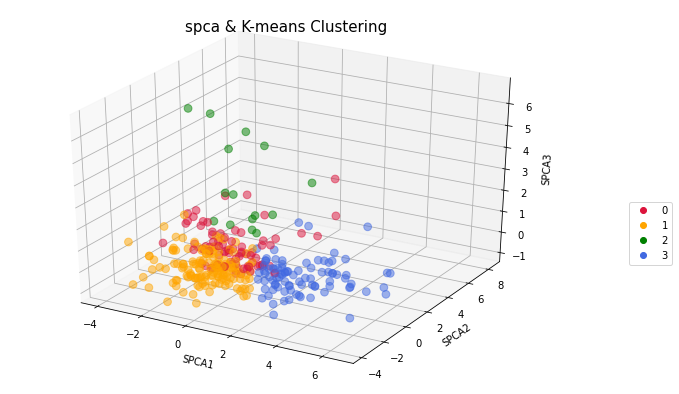

In [25]:
ClusteringPlot(4, color_list)